In [70]:
import pandas as pd
import numpy as np

In [71]:
df=pd.read_csv("Churn_Modelling.csv")

In [72]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [73]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [76]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [77]:
df.size

140000

In [78]:
df.shape

(10000, 14)

In [79]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

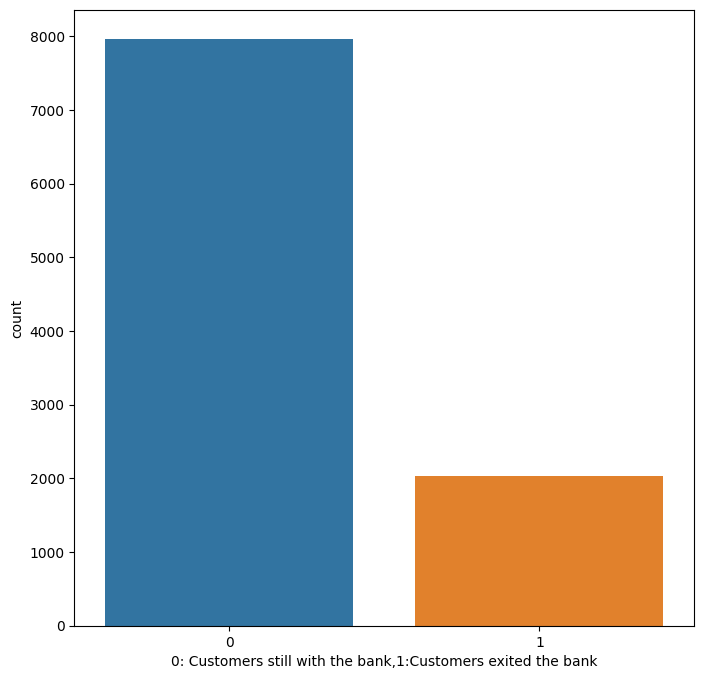

In [81]:
plt.figure(figsize=(8,8))
sns.countplot(x='Exited',data=df)
plt.xlabel('0: Customers still with the bank,1:Customers exited the bank')
plt.ylabel('count')
plt.show()

In [82]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [83]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)


In [84]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [85]:
#categorical to numerical
geography=pd.get_dummies(df['Geography'])

In [86]:
gender=pd.get_dummies(df['Gender'])

In [87]:
df=pd.concat([df,geography,gender],axis=1)

In [88]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [89]:
df.drop(['Geography','Gender'],axis=1,inplace=True)

In [90]:
#split the dataset into x and y
x=df.drop('Exited',axis=1)
y=df['Exited']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [93]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [94]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [95]:
classifier=Sequential()

In [30]:
'''The provided code snippet is adding a dense layer to a Keras model. Let's break down the code step by step:

1. **Importing Libraries:**

```python
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
```

This code imports the `models` and `Dense` classes from the TensorFlow Keras library. These classes are essential for building neural networks in TensorFlow.

2. **Adding a Dense Layer:**

```python
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))
```

This line of code adds a dense layer to the `classifier` model. Here's a breakdown of the arguments:

- `classifier`: This refers to the existing Keras model to which we want to add the dense layer.

- `units=6`: This specifies the number of neurons (units) in the dense layer. Each neuron represents a processing point within the layer.

- `kernel_initializer='he_uniform'`: This sets the initialization method for the layer's weights (kernels). The `he_uniform` initializer follows the He uniform distribution, which is a commonly used method for initializing weights in deep learning.

- `activation='relu'`: This defines the activation function for the layer. The ReLU (Rectified Linear Unit) activation function is widely used in neural networks, especially for hidden layers. It introduces non-linearity into the network, allowing it to capture complex relationships between inputs and outputs.

- `input_dim=11`: This specifies the dimensionality of the input data that will be fed into the dense layer. In this case, the input data has 11 features.

In summary, this code adds a dense layer with 6 neurons, He uniform initialization, ReLU activation, and an input dimension of 11 features to the specified Keras model. This layer will play a crucial role in extracting meaningful patterns and features from the input data.'''

In [96]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",input_dim=13))

In [97]:
# Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))

In [98]:
# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

In [99]:
# Compiling the ANN
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [100]:
# Fitting the ANN to the Training set
model_history=classifier.fit(x_train,y_train,batch_size=10,validation_split=0.33,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5400 - accuracy: 0.7765 - val_loss: 0.4941 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4796 - accuracy: 0.7962 - val_loss: 0.4692 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4593 - accuracy: 0.7962 - val_loss: 0.4564 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4463 - accuracy: 0.7962 - val_loss: 0.4475 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4342 - accuracy: 0.7962 - val_loss: 0.4372 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4227 - accuracy: 0.7962 - val_loss: 0.4283 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8005 - val_loss: 0.4202 - val_accuracy: 0.8035

In [101]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

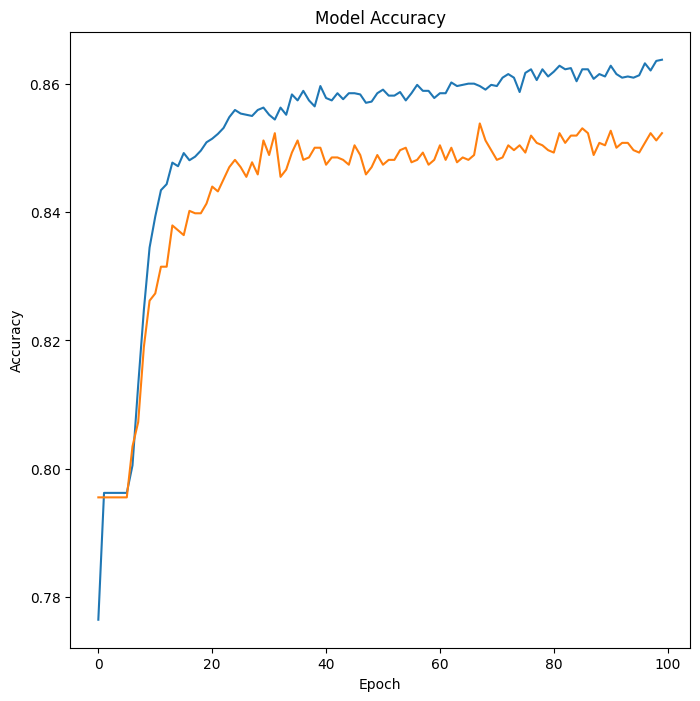

In [102]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

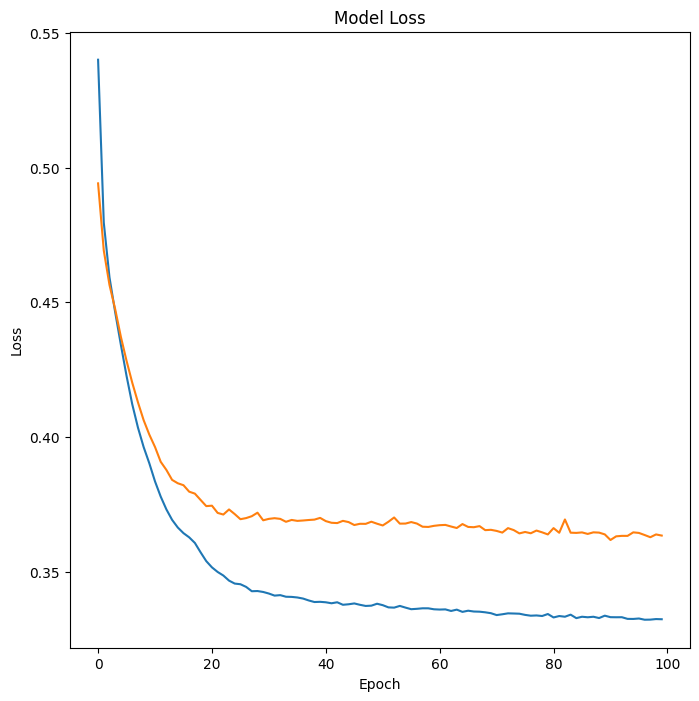

In [103]:
plt.figure(figsize=(8,8))
plt.title("Model Loss")
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [104]:
# Predicting the Test set results
y_pred=classifier.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [105]:
y_pred

array([[0.3177151 ],
       [0.19260134],
       [0.10752201],
       ...,
       [0.16228606],
       [0.30481035],
       [0.33061615]], dtype=float32)

In [106]:
y_pred=y_pred>0.5
#true if >0.5 else false
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [109]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1491,  104],
       [ 193,  212]])

In [110]:
from sklearn.metrics import accuracy_score
asco=accuracy_score(y_test,y_pred)
asco

0.8515

In [111]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [126]:
arr=[[738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1,0,1]]
cp=classifier.predict(sc.fit_transform(arr))

1/1 [==============================] - 0s 14ms/step


In [120]:
cp

array([[0.73510945]], dtype=float32)

In [122]:
cp=cp>0.5
cp

array([[False]])

In [ ]:
#false=low chance of exit
#true=high chance of exit